## 붓꽃 데이터 분류

### #01. 패키지 참조

In [3]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier
# 분류 결과 평가를 위한 패키지
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings('ignore')


In [4]:
origin = read_excel("https://data.hossam.kr/G02/iris.xlsx")
origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
origin['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
labels = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
labels

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [7]:
# 결과출력을 위한 라벨 역 정의
classes = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
classes

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [8]:
# 라벨링
df = origin.copy()
df['Species'] = df['Species'].map(labels)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
x = df.drop('Species', axis=1)
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y = df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

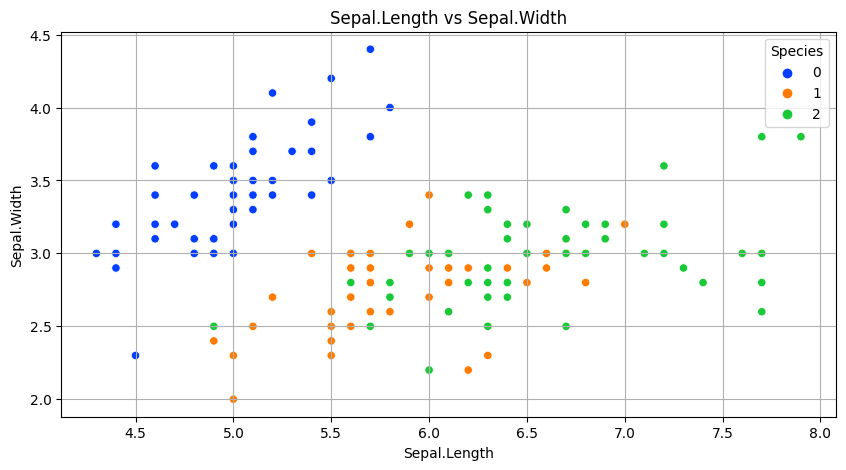

In [11]:
plt.figure(figsize=(10, 5))
sb.scatterplot(data=df, x='Sepal.Length', y='Sepal.Width', hue='Species',
palette='bright')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.title('Sepal.Length vs Sepal.Width')
plt.grid()
plt.show()
plt.close()

<Figure size 1500x1000 with 0 Axes>

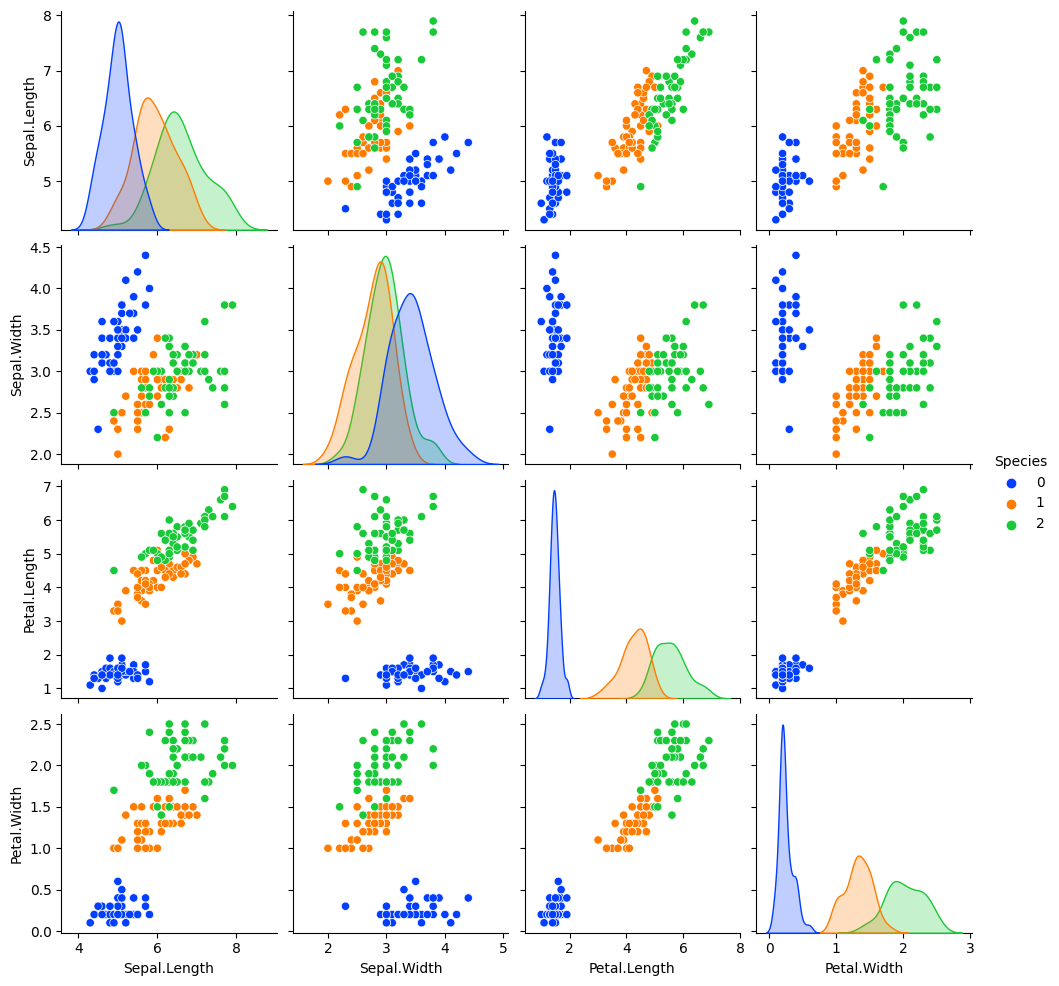

In [12]:
plt.figure(figsize=(15, 10))
sb.pairplot(data=df, hue='Species', palette='bright')
plt.show()
plt.close()

In [13]:
# 이웃의 수
k = 3
# 모델 정의(내가 사용하고자 하는 알고리즘을 선택)
knn = KNeighborsClassifier(n_neighbors=k)
# 학습
knn.fit(x, y)
# 예측치 생성
y_pred = knn.predict(x)
# 측정값과 예측치를 데이터프레임으로 생성
y_pref_df = DataFrame({'y': y.values, 'y_pred': y_pred})
y_pref_df

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


In [14]:
#new_data = [[5.2, 3.5, 1.5, 0.2], [6.2, 3.5, 5.4, 2.3]]
new_data = [[5.2, 3.5, 1.5, 0.2]]

In [15]:
new_data_pred = knn.predict(new_data)
print("데이터: {0}, 예측: {1}".format(new_data_pred[0], classes[new_data_pred[0]]))

데이터: 0, 예측: setosa


In [16]:
dist, index = knn.kneighbors(new_data)
print("거리: {0}, 인덱스: {1}".format(dist, index))

거리: [[0.         0.14142136 0.14142136]], 인덱스: [[27 28  0]]


In [17]:
df.values[index]

array([[[5.2, 3.5, 1.5, 0.2, 0. ],
        [5.2, 3.4, 1.4, 0.2, 0. ],
        [5.1, 3.5, 1.4, 0.2, 0. ]]])

In [18]:
neighbors_data = df.iloc[index[0]]
neighbors_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
27,5.2,3.5,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
0,5.1,3.5,1.4,0.2,0


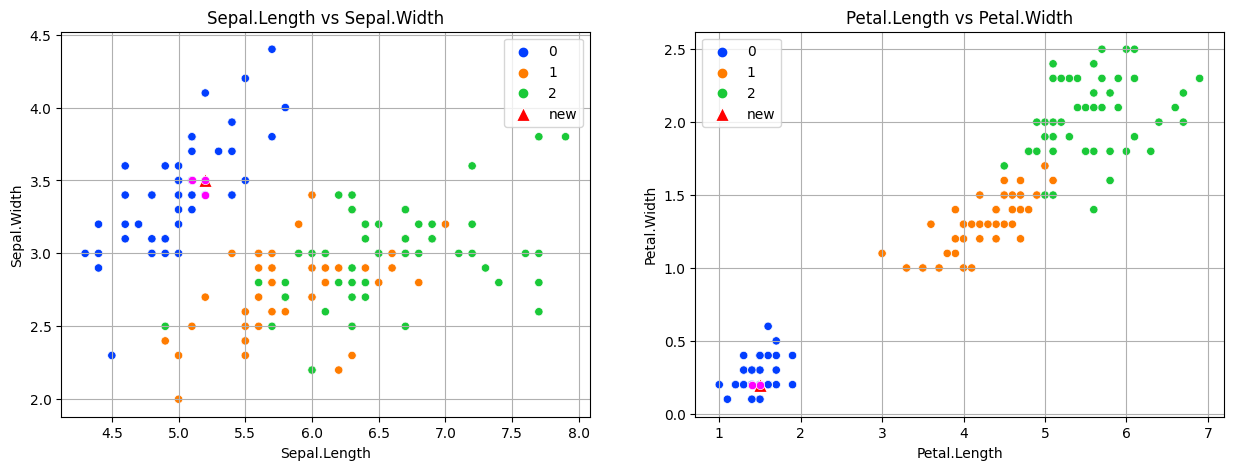

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# Sepal.Length vs Sepal.Width
sb.scatterplot(data=df, x='Sepal.Length', y='Sepal.Width', hue='Species',
palette='bright', ax=ax1)
ax1.set_xlabel('Sepal.Length')
ax1.set_ylabel('Sepal.Width')
ax1.set_title('Sepal.Length vs Sepal.Width')
ax1.grid()
# 새로운 데이터 투입
#ax1.scatter(new_data[0][0], new_data[0][1], marker='^', s=100, c='r', label='new')
sb.scatterplot(x=[new_data[0][0]], y=[new_data[0][1]], marker="^", s=100,
c='r', label='new', ax=ax1)
# 근접 이웃 표시
sb.scatterplot(data=neighbors_data, x='Sepal.Length', y='Sepal.Width',
c='#ff00ff', ax=ax1)
# Petal.Length vs Petal.Width
sb.scatterplot(data=df, x='Petal.Length', y='Petal.Width', hue='Species',
palette='bright', ax=ax2)
ax2.set_xlabel('Petal.Length')
ax2.set_ylabel('Petal.Width')
ax2.set_title('Petal.Length vs Petal.Width')
ax2.grid()
sb.scatterplot(x=[new_data[0][2]], y=[new_data[0][3]], marker="^", s=100, c='r', label='new', ax=ax2)
# 근접 이웃 표시
sb.scatterplot(data=neighbors_data, x='Petal.Length', y='Petal.Width',
    c='#ff00ff', ax=ax2)
plt.show()
plt.close()


In [20]:
conf_mat = confusion_matrix(y_pref_df['y'], y_pref_df['y_pred'])
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [21]:
cls_labels = list(classes.values())
cls_labels

['setosa', 'versicolor', 'virginica']

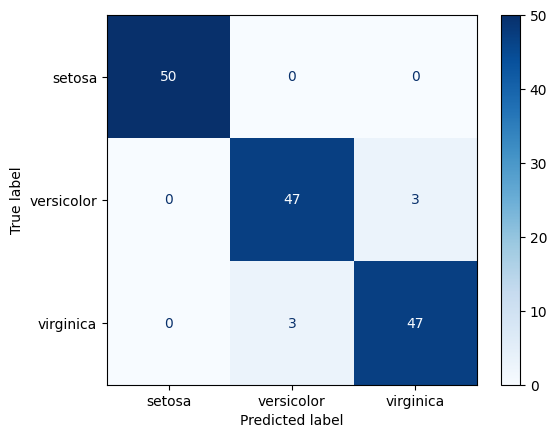

In [22]:
plot = ConfusionMatrixDisplay.from_predictions(
y_pref_df['y'], # 정답
y_pref_df['y_pred'], # 예측치
display_labels=cls_labels, # 라벨
cmap=plt.cm.Blues # 칼라맵 이름
)
plt.show()
plt.close()

In [23]:
scores = accuracy_score(y_pref_df['y'], y_pref_df['y_pred'])
print("n_naighbors: {0}, 정확도: {1:.2f}".format(k, scores))

n_naighbors: 3, 정확도: 0.96


In [24]:
scores = precision_score(y_pref_df['y'], y_pref_df['y_pred'], average='macro')
print("n_naighbors: {0}, 정밀도: {1:.2f}".format(k, scores))
scores = recall_score(y_pref_df['y'], y_pref_df['y_pred'], average='macro')
print("n_naighbors: {0}, 재현율: {1:.2f}".format(k, scores))
scores = f1_score(y_pref_df['y'], y_pref_df['y_pred'], average='macro')
print("n_naighbors: {0}, f값: {1:.2f}".format(k, scores))

n_naighbors: 3, 정밀도: 0.96
n_naighbors: 3, 재현율: 0.96
n_naighbors: 3, f값: 0.96
